#### Criação e Avaliação de Modelos de Classificação

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [3]:
df = pd.read_csv("../Data/dataset_codificado.csv")

#### Pré-Processamento

In [4]:
X = df.drop(columns=['Qualidade_Ar'], axis=1)
y = df['Qualidade_Ar']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [6]:
scalers = {
    'MaxAbsScaler': MaxAbsScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

In [7]:
scaled_data = {}

for name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    scaled_data[name] = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled
    }

In [8]:
def treinar_modelo(modelo, resultados):
    for nome, scaled in scaled_data.items():
        X_train_scaled = scaled['X_train']
        X_test_scaled = scaled['X_test']
        
        modelo.fit(X_train_scaled, y_train)
        
        y_pred = modelo.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        resultados[nome] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
        }

In [9]:
def apresentar_resultados(modelo):
    dicionario_resultados = {}
    treinar_modelo(modelo, dicionario_resultados)
    df_modelo = pd.DataFrame(dicionario_resultados).T
    return df_modelo

#### LogisticRegression

In [10]:
logistic_regression = LogisticRegression(random_state=101)

In [11]:
apresentar_resultados(logistic_regression)

,Accuracy,Precision,Recall,F1-Score
MaxAbsScaler,0.917,0.917193,0.917,0.914847
MinMaxScaler,0.919,0.918883,0.919,0.917094
RobustScaler,0.936,0.935396,0.936,0.935130
StandardScaler,0.935,0.934379,0.935,0.934223


#### DecisionTree

In [12]:
decision_tree = DecisionTreeClassifier(random_state=101)

In [13]:
apresentar_resultados(decision_tree)

,Accuracy,Precision,Recall,F1-Score
MaxAbsScaler,0.917,0.916615,0.917,0.916704
MinMaxScaler,0.917,0.916615,0.917,0.916704
RobustScaler,0.917,0.916615,0.917,0.916704
StandardScaler,0.915,0.914760,0.915,0.914823


#### RandomForest

In [14]:
random_forest = RandomForestClassifier(random_state=101)

In [15]:
apresentar_resultados(random_forest)

,Accuracy,Precision,Recall,F1-Score
MaxAbsScaler,0.951,0.950522,0.951,0.950664
MinMaxScaler,0.951,0.950522,0.951,0.950664
RobustScaler,0.951,0.950605,0.951,0.950720
StandardScaler,0.951,0.950522,0.951,0.950664


#### GradientBoosting

In [17]:
grandient_boosting = GradientBoostingClassifier(random_state=101)

In [18]:
apresentar_resultados(grandient_boosting)

,Accuracy,Precision,Recall,F1-Score
MaxAbsScaler,0.945,0.94515,0.945,0.944685
MinMaxScaler,0.945,0.94515,0.945,0.944685
RobustScaler,0.945,0.94515,0.945,0.944685
StandardScaler,0.945,0.94515,0.945,0.944685


#### GaussianNB

In [23]:
gaussian_nb = GaussianNB()

In [24]:
apresentar_resultados(gaussian_nb)

,Accuracy,Precision,Recall,F1-Score
MaxAbsScaler,0.912,0.910598,0.912,0.910391
MinMaxScaler,0.912,0.910598,0.912,0.910391
RobustScaler,0.912,0.910598,0.912,0.910391
StandardScaler,0.912,0.910598,0.912,0.910391


#### XGB

In [25]:
xgb_classifier = XGBClassifier(random_state=101)

In [26]:
apresentar_resultados(xgb_classifier)

,Accuracy,Precision,Recall,F1-Score
MaxAbsScaler,0.94,0.939874,0.94,0.939723
MinMaxScaler,0.94,0.939874,0.94,0.939723
RobustScaler,0.94,0.939874,0.94,0.939723
StandardScaler,0.94,0.939874,0.94,0.939723


#### Comparação de Resultados

In [27]:
comparacao_accuracy = {}

In [28]:
modelos = {
    "LogisticRegression": LogisticRegression(random_state=101),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=101),
    "RandomForest": RandomForestClassifier(random_state=101),
    "GradientBoosting": GradientBoostingClassifier(random_state=101),
    "GaussianNB": GaussianNB(),
    "XGBClassifier": XGBClassifier(random_state=101)
}

In [31]:
for nome_modelo, modelo in modelos.items():
    df_resultados = apresentar_resultados(modelo)
    comparacao_accuracy[nome_modelo] = df_resultados['Accuracy'].mean()

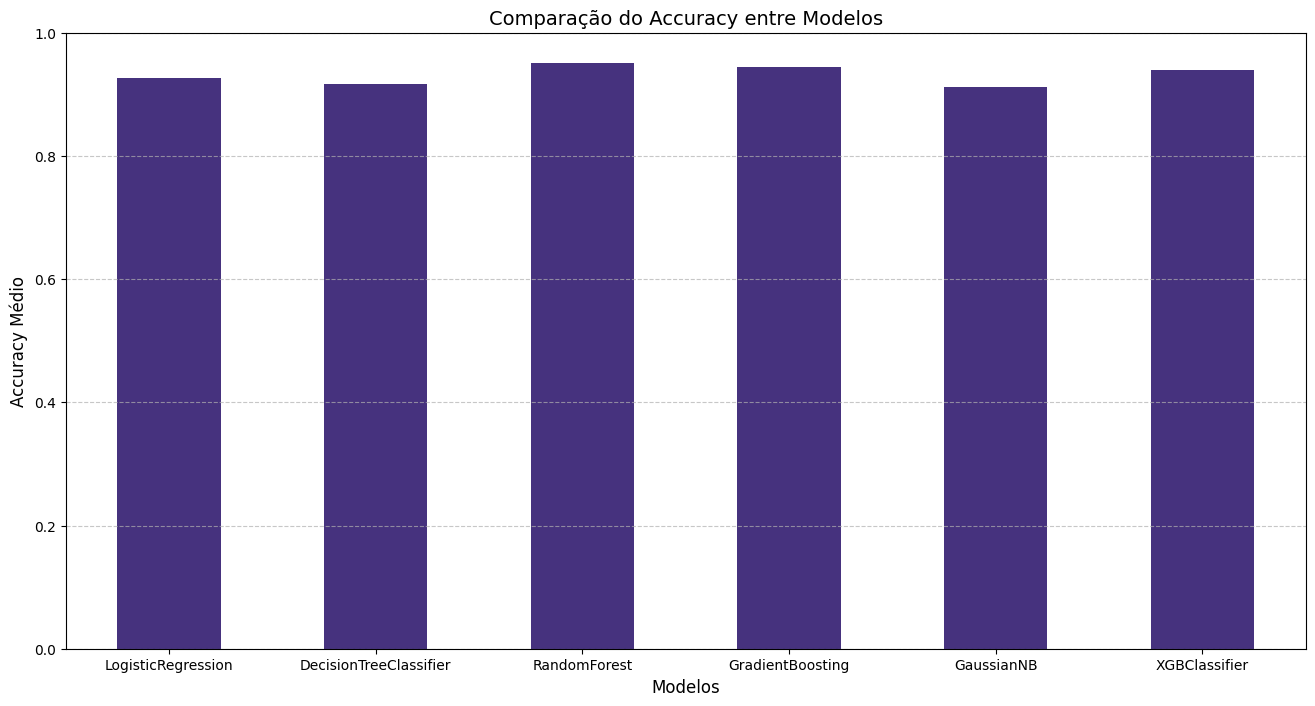

In [32]:
accuracy_df = pd.DataFrame(list(comparacao_accuracy.items()), columns=['Modelo', 'Accuracy'])
accuracy_df.set_index('Modelo', inplace=True)

cores_personalizadas = sns.color_palette("viridis", len(accuracy_df))

accuracy_df.plot(
    kind='bar', 
    color=cores_personalizadas, 
    figsize=(16, 8), 
    legend=False
)
plt.title('Comparação do Accuracy entre Modelos', fontsize=14)
plt.ylabel('Accuracy Médio', fontsize=12)
plt.xlabel('Modelos', fontsize=12)
plt.ylim(0, 1)  
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()